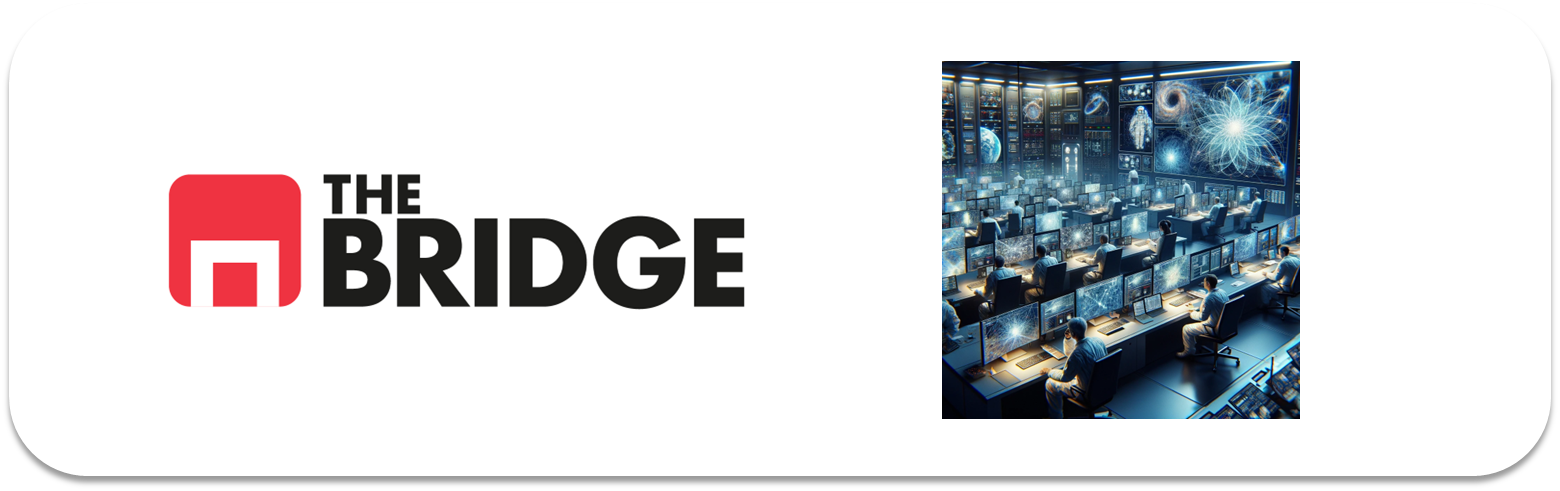

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.metrics import confusion_matrix
import keras
import cv2

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



In [2]:
ROOT_PATH = './data/'
directorio = ROOT_PATH + "train/"
os.listdir(directorio)

['cat.1.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg',
 'cat.10005.jpg',
 'cat.10010.jpg',
 'cat.10012.jpg',
 'cat.10013.jpg',
 'cat.10017.jpg',
 'cat.10018.jpg',
 'cat.10019.jpg',
 'cat.1002.jpg',
 'cat.10021.jpg',
 'cat.10022.jpg',
 'cat.10023.jpg',
 'cat.10024.jpg',
 'cat.10025.jpg',
 'cat.10027.jpg',
 'cat.10028.jpg',
 'cat.10030.jpg',
 'cat.10031.jpg',
 'cat.10032.jpg',
 'cat.10036.jpg',
 'cat.10037.jpg',
 'cat.10038.jpg',
 'cat.10039.jpg',
 'cat.1004.jpg',
 'cat.10045.jpg',
 'cat.10047.jpg',
 'cat.10048.jpg',
 'cat.10052.jpg',
 'cat.10054.jpg',
 'cat.10055.jpg',
 'cat.10056.jpg',
 'cat.10057.jpg',
 'cat.10058.jpg',
 'cat.10059.jpg',
 'cat.10062.jpg',
 'cat.10063.jpg',
 'cat.10067.jpg',
 'cat.1007.jpg',
 'cat.10070.jpg',
 'cat.10072.jpg',
 'cat.10075.jpg',
 'cat.10077.jpg',
 'cat.10079.jpg',
 'cat.1008.jpg',
 'cat.10080.jpg',
 'cat.10081.jpg',
 'cat.10084.jpg',
 'cat.10086.jpg',
 'cat.10088.jpg',
 'cat.10091.jpg',
 'c

In [3]:
ROOT_PATH = './data/'
TRAIN_PATH = ROOT_PATH + "train/"
TEST_PATH = ROOT_PATH + "test/"


def read_data(directorio, reshape_dim = (64,64)):
    X = []
    y = []
    for file in os.listdir(directorio):
        

        image = imread('/'.join([directorio, file]))
        image = cv2.resize(image, reshape_dim) # Redimensionamos las imágenes a 32x32

        X.append(image)
        y.append(file[:3])

    return np.array(X),np.array(y)

In [4]:
X_train,y_train = read_data(TRAIN_PATH)
X_test, y_test = read_data(TEST_PATH)

In [5]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)


X train shape:  (4000, 64, 64, 3)
Y train shape:  (4000,)


In [6]:
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)

X test shape:  (1000, 64, 64, 3)
Y test shape:  (1000,)


In [7]:
def show_images_batch(cat_dog, names = [], n_cols = 5, size_scale = 2):
    n_rows = ((len(cat_dog) - 1) // n_cols + 1)
    plt.figure(figsize=(n_cols * size_scale, n_rows * 1.1*size_scale))
    for index, paisaje in enumerate(cat_dog):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(paisaje, cmap = "Greys")
        plt.axis("off")
        if len(names):
            plt.title(names[index])

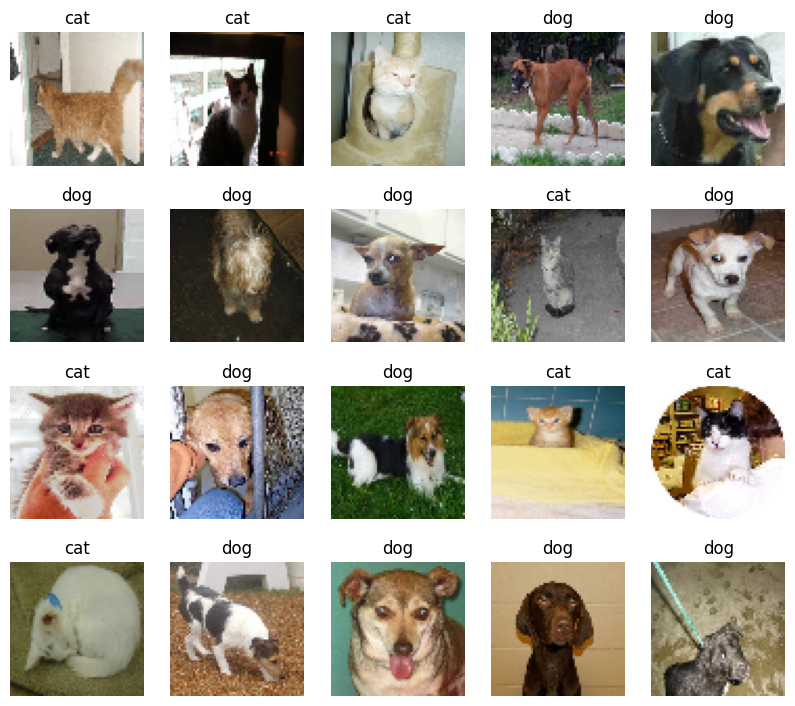

In [8]:
indices = np.random.randint(0,len(X_train),20)
show_images_batch(X_train[indices], names = y_train[indices], n_cols = 5)

In [9]:
targets = pd.Series(y_train)
targets.value_counts(True)

cat    0.5
dog    0.5
Name: proportion, dtype: float64

In [10]:
X_train.min()


0

In [11]:
X_train.max()

255

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:

capas = [keras.Input((X_train[0].shape)),
         keras.layers.Conv2D(filters = 8, kernel_size = (3, 3),
                            padding = "same",
                            activation = 'relu'),
         keras.layers.MaxPooling2D(pool_size = (2, 2), strides=(2,2)),
         keras.layers.Dropout(0.20),

# Añadimos otra capa de convolución y pooling
         keras.layers.Conv2D(filters = 16,
                             kernel_size = (3, 3),
                             padding = "same",
                             activation = 'relu'),
         keras.layers.MaxPooling2D(pool_size = (2, 2), strides=(2,2)),
         keras.layers.Dropout(0.20),

# Añadimos una capa de flatten para convertir la salida de la capa de pooling en un vector
         keras.layers.Flatten(),

# Añadimos dos capas densas para la clasificación
         keras.layers.Dense(units = 512, activation = 'relu'),
        
         keras.layers.Dropout(0.20),

# Añadimos la capa de salida con 2 neuronas, una por cada clase
         keras.layers.Dense(2, activation = 'softmax')]

# Creamos el modelo
model = keras.Sequential(capas)

In [14]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate =0.001, beta_1=0.9, beta_2=0.999) 

In [15]:
# Compilacion
model.compile(optimizer = optimizer , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,100,082 (8.01 MB)

 Trainable params: 2,100,082 (8.01 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
mapa = {tipo:indice for indice,tipo in enumerate(targets.unique())} # Rehusando la serie que creamos para ver la distribución del target
mapa

{'cat': 0, 'dog': 1}

In [18]:
y_train_num = np.array([mapa[y] for y in y_train])
y_test_num = np.array([mapa[y] for y in y_test])

In [ ]:
X_train, y_train_num = shuffle(X_train, y_train_num, random_state=42)

In [20]:
history = model.fit(X_train,
                    y_train_num,
                    validation_split = 0.2,
                    epochs = 100,
                    batch_size = 64, callbacks= [keras.callbacks.EarlyStopping(patience = 10, restore_best_weights= True)])

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5153 - loss: 1.0751 - val_accuracy: 0.5775 - val_loss: 0.6685
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5876 - loss: 0.6671 - val_accuracy: 0.6300 - val_loss: 0.6407
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6317 - loss: 0.6429 - val_accuracy: 0.6388 - val_loss: 0.6250
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6407 - loss: 0.6266 - val_accuracy: 0.6538 - val_loss: 0.6106
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6938 - loss: 0.5865 - val_accuracy: 0.6662 - val_loss: 0.5978
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6783 - loss: 0.5943 - val_accuracy: 0.6700 - val_loss: 0.5961
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7052 - loss: 0.5615 - val_accuracy: 0.7113 - val_loss: 0.5758
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7221 - loss: 0.5380 - val_accuracy: 0.

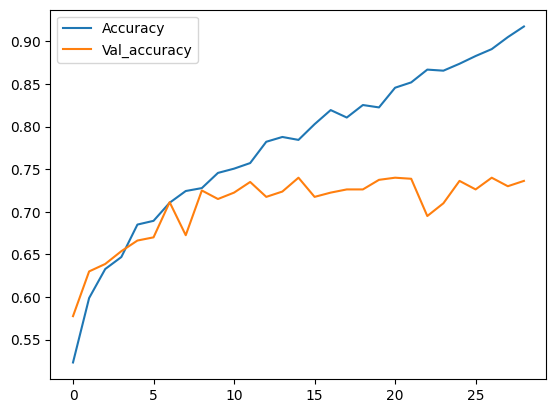

In [21]:
# Representamos el objeto history
history_df = pd.DataFrame(history.history)
plt.plot(history_df['accuracy'], label = 'Accuracy')
plt.plot(history_df['val_accuracy'], label = 'Val_accuracy')

plt.legend();

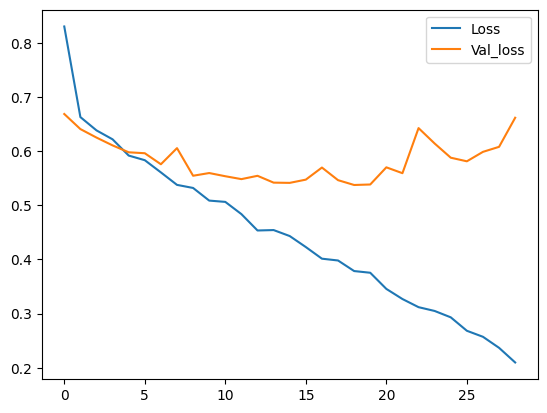

In [22]:
plt.plot(history_df['loss'], label = 'Loss')
plt.plot(history_df['val_loss'], label = 'Val_loss')

plt.legend();

In [23]:
model.evaluate(X_test,y_test_num)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6918 - loss: 0.6078


[0.5548813939094543, 0.7099999785423279]

In [24]:
y_pred = [np.argmax(prediction) for prediction in  model.predict(X_test)]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [25]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_test_num,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       500
           1       0.70      0.74      0.72       500

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000



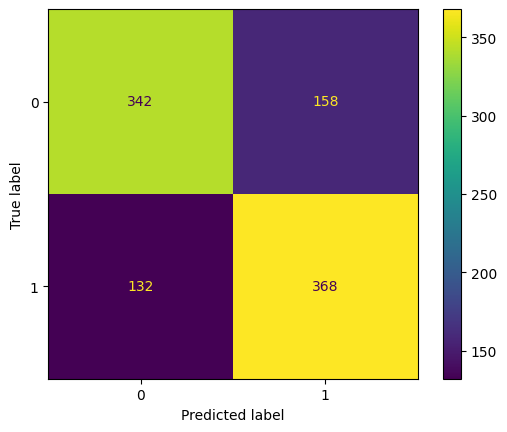

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test_num, y_pred)

In [38]:
y_proba = model.predict(X_test)[:10]
y_proba

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.32419348, 0.6758065 ],
       [0.6156583 , 0.38434166],
       [0.7436861 , 0.25631386],
       [0.24658433, 0.7534157 ],
       [0.3411145 , 0.65888554],
       [0.8555806 , 0.14441936],
       [0.96541756, 0.03458246],
       [0.45238033, 0.5476197 ],
       [0.7818448 , 0.21815526],
       [0.930407  , 0.06959304]], dtype=float32)

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.

In [39]:
inverse_map = {valor:clave for clave,valor in mapa.items()}
y_test_labels = [inverse_map[y] for y in y_test_num]
y_pred_labels = [inverse_map[y] for y in y_pred]

In [40]:
confianza = [prediction.max() for prediction in model.predict(X_test)]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [41]:
pred_df = pd.DataFrame({"True": y_test_labels, "Predicted": y_pred_labels, "Confianza": confianza})

In [42]:
error = pred_df["True"] != pred_df["Predicted"]
errores = pred_df[error].sort_values("Confianza", ascending = False)
errores

,True,Predicted,Confianza
337,cat,dog,0.997049
13,cat,dog,0.992549
153,cat,dog,0.984921
243,cat,dog,0.971456
214,cat,dog,0.967332
...,...,...,...
178,cat,dog,0.505805
933,dog,cat,0.504650
157,cat,dog,0.504426
643,dog,cat,0.502714


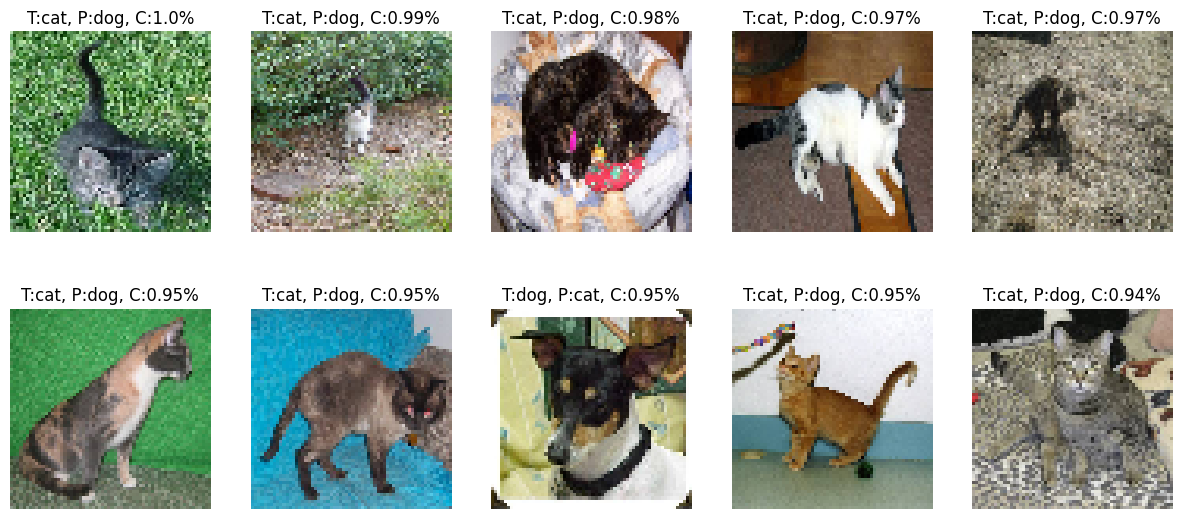

In [45]:
show_images_batch(X_test[errores.iloc[0:10].index],names= [f"T:{val1}, P:{val2}, C:{round(val3,2)}%" for val1,val2,val3 in errores.iloc[0:10].values], size_scale= 3)